In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [ ]:
# Read data
data = pd.read_csv("glass.data", sep=',')
classLabels = data[data.columns[data.shape[1]-1]].tolist()
attributeNames = ["RI", "Na", "Mg", "Al", "Si",
                  "K", "Ca", "Ba", "Fe", "Sample Type"]
classNames = ["BuildingFloat", "BuildingNonFloat",
              "VehicleFloat", "VehicleNonFloat",
              "Containers", "Tablewear", "Headlamps"]
classDict = dict(zip(range(1,8), classNames))

# prepare
y = np.asarray([classDict[value] for value in classLabels])
X = data.to_numpy()
X = np.delete(X, 10, 1)
X = np.delete(X, 0, 1)
N = len(y)
M = len(attributeNames)
C = len(classNames)

In [3]:
#       OURS!


filename = "../MyData/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(filename)

raw_data = df.values

cols = range(0, 12)
X = raw_data[:, cols]
# Column of platelets has to be divided with 1000,mistake in data
X[:, 6] /= 1000

attributeNames = np.asarray(df.columns[cols])

classLabels = raw_data[:, -1]  # -1 takes the last column

classNames = np.unique(classLabels)

classDict = dict(zip(classNames, range(len(classNames))))

y = np.array([classDict[cl] for cl in classLabels])

N, M = X.shape

C = len(classNames)

In [4]:
#       OURS!
#       For statistical results-Part 2 of Report


for column_index in range(X.shape[1]):
    column_mean = np.mean(X[:, column_index])
    column_std = np.std(X[:, column_index], ddof=1)
    column_median = np.median(X[:, column_index])
    column_range = np.max(X[:, column_index]) - np.min(X[:, column_index])
    print(f"Attribute {attributeNames[column_index]}")
    print(f"Mean : {column_mean}")
    print(f"Standar Deviation : {column_std}")
    print(f"Median : {column_median}")
    print(f"Range: {column_range}")
    print()


Attribute age
Mean : 60.83389297658862
Standar Deviation : 11.89480907404447
Median : 60.0
Range: 55.0

Attribute anaemia
Mean : 0.431438127090301
Standar Deviation : 0.4961072681330793
Median : 0.0
Range: 1.0

Attribute creatinine_phosphokinase
Mean : 581.8394648829432
Standar Deviation : 970.2878807124362
Median : 250.0
Range: 7838.0

Attribute diabetes
Mean : 0.4180602006688963
Standar Deviation : 0.49406706510360904
Median : 0.0
Range: 1.0

Attribute ejection_fraction
Mean : 38.08361204013378
Standar Deviation : 11.834840741039171
Median : 38.0
Range: 66.0

Attribute high_blood_pressure
Mean : 0.3511705685618729
Standar Deviation : 0.47813637906274475
Median : 0.0
Range: 1.0

Attribute platelets
Mean : 263.35802926421405
Standar Deviation : 97.8042368685983
Median : 262.0
Range: 824.9

Attribute serum_creatinine
Mean : 1.3938795986622072
Standar Deviation : 1.0345100640898541
Median : 1.1
Range: 8.9

Attribute serum_sodium
Mean : 136.62541806020067
Standar Deviation : 4.41247728390

In [ ]:
#       OURS!

Y = X - np.ones((N, 1)) * X.mean(axis=0)

# PCA by computing SVD of Y
U, S, V = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

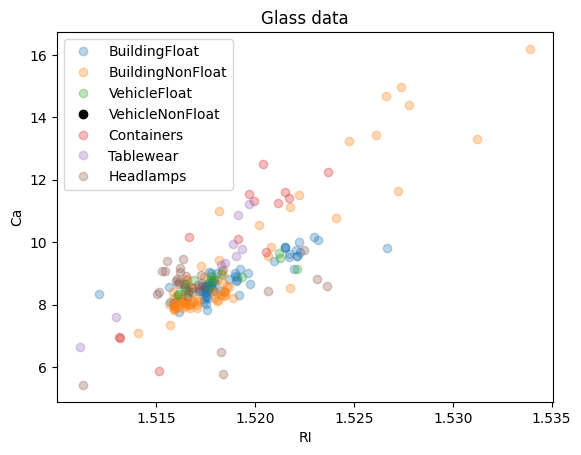

In [ ]:
# %% Make a simple correlation plot with figure
i = 0
j = 6

f = figure()
title('Glass data')

# print(y)
# print(classDict)

for c in classNames:
#     # select indices belonging to class c:
    class_mask = y==c
    if c == "VehicleNonFloat":
        plot(X[class_mask,i], X[class_mask,j], 'ko')
    else:
        plot(X[class_mask,i], X[class_mask,j], 'o',alpha=.3)


legend(classNames)
xlabel(attributeNames[i])
ylabel(attributeNames[j])

# Output result to screen
show()

[2.52464473e+01 1.87665079e+01 1.19832924e+01 1.17031826e+01
 6.66185457e+00 4.64128083e+00 1.38275367e+00 5.60858969e-01
 1.43443487e-02]


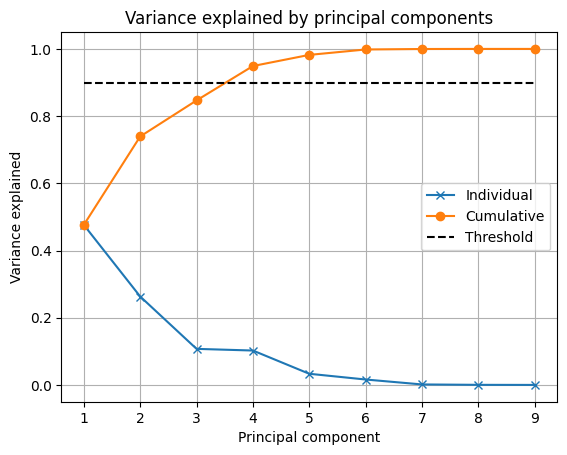

In [ ]:
Y = X - np.ones((N,1))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
# plt.savefig('PCAVariance.png')
print(S)
plt.show()

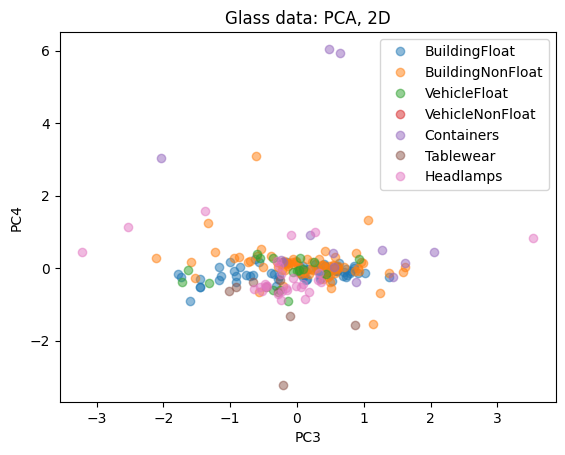

In [ ]:
# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(0)

i = 2
j = 3

# Plot PCA of the data
f = figure()
title('Glass data: PCA, 2D')
#Z = array(Z)
for c in classNames:
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))
# plt.savefig('2DPCA.png')

# Output result to screen
plt.show()

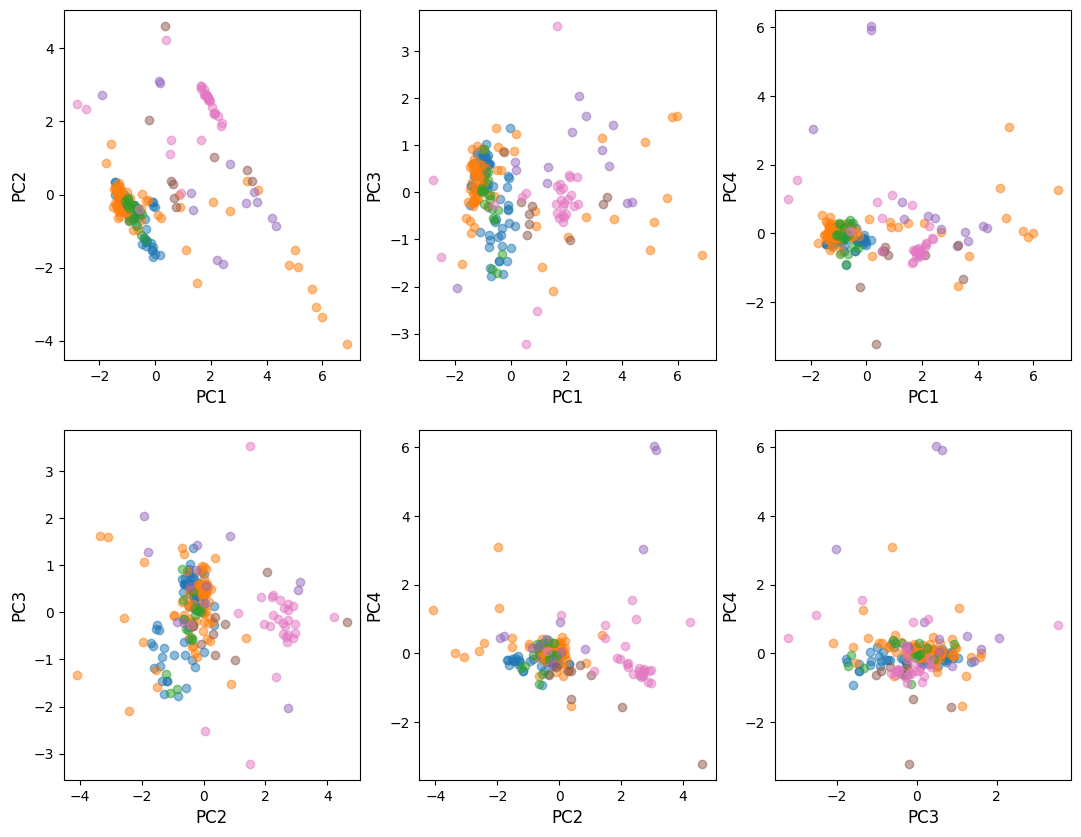

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(13, 10))
# fig.suptitle('PCA for first 4 Primary Components', fontsize=30)
# plt.subplots_adjust(hspace=.5)
axes = axes.flatten()

i = 0
j = 1

for subInd in range(6):
  ax = axes[subInd]
  for c in classNames:
      # select indices belonging to class c:
      class_mask = y==c
      ax.plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
      ax.set_ylabel('PC{0}'.format(j+1), fontsize=12)
      ax.set_xlabel('PC{0}'.format(i+1), fontsize=12)
  # ax.legend(classNames)
  j+=1
  if j == 4:
    if i == 0:
      i = 1
      j = 2
    else:
      i = 2
      j = 3
plt.savefig('PCACollage.png')


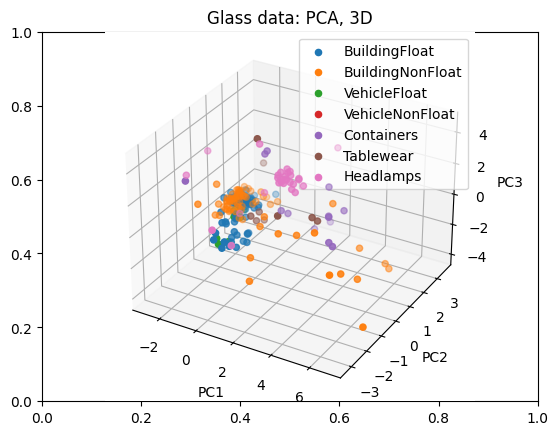

In [ ]:
# %% Perform 3d PCA
# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1
k = 2

# Plot PCA of the data
f = figure()
title('Glass data: PCA, 3D')
ax = plt.axes(projection='3d')
# ax.scatter(Z[:,1],Z[:,2],Z[:,3])

# Z = array(Z)
for c in classNames:
    # select indices belonging to class c:
    class_mask = y==c
    ax.scatter(Z[class_mask,i],Z[class_mask,k],Z[class_mask,j])
    # plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
ax.set_xlabel('PC{0}'.format(i+1))
ax.set_ylabel('PC{0}'.format(j+1))
ax.set_zlabel('PC{0}'.format(k+1))
# plt.savefig('3DPCA.png')
# zlabel('PC{0}'.fornat(k+1))

# Output result to screen
show()

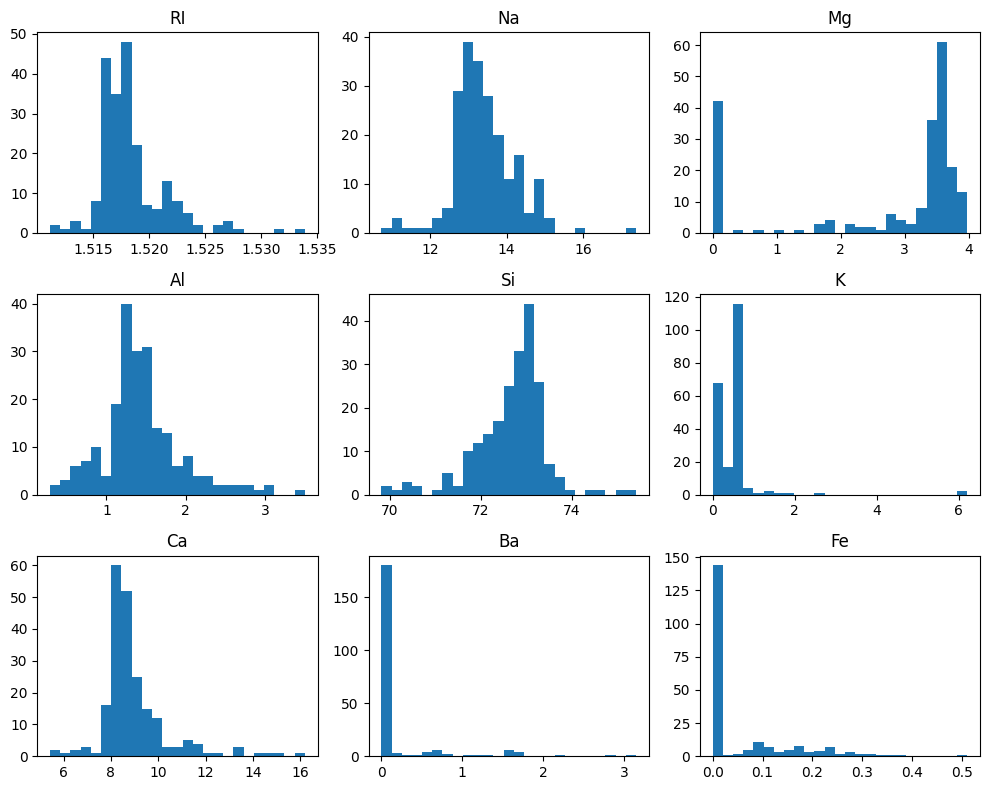

In [ ]:
data = [np.random.randn(1000) for _ in range(9)]

# Create a 3x3 grid of subplots for histograms
fig, axes = plt.subplots(3, 3, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()
beans = 25

# Create histograms for each subplot
for i in range(9):
    ax = axes[i]
    ax.hist(X[:,i], bins=beans)
    ax.set_title(attributeNames[i])

# Add a title for the entire grid of histograms
# fig.suptitle(f'Attribute Histograms(bins = {beans})', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()
# fig.savefig('grid_of_histograms.png')
# Display the plot
plt.show()

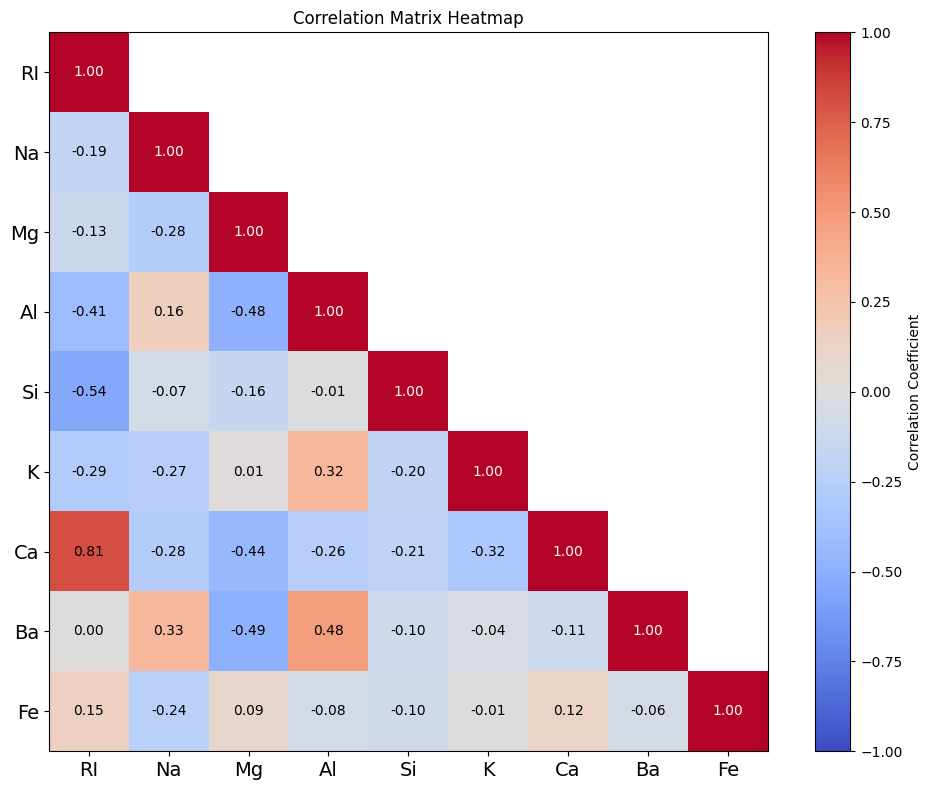

In [ ]:
# Sample data (replace this with your own data)
data = np.random.rand(10, 9)  # Replace with your actual data

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(X, rowvar=False)

# print(correlation_matrix)

# Create a heatmap of the correlation matrix
mask = np.ones_like(correlation_matrix, dtype=bool)


for i in range(9):
    for j in range(9):
        if i < j:
          mask[i, j] = False
        else:
          pass

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(np.ma.masked_array(correlation_matrix, mask=~mask), cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

# plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(heatmap, label='Correlation Coefficient')
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(attributeNames)-1), attributeNames[:-1], fontsize=14)
# plt.xticks(np.arange(9), [c for c in classNames], rotation=45)
plt.yticks(range(len(attributeNames)-1), attributeNames[:-1], fontsize=14)
plt.tight_layout()
for i in range(9):
    for j in range(9):
        if i <= j:
          plt.text(j, i, f'{correlation_matrix[i, j]:.2f}', ha='center', va='center', color='white')
          ax.text(3,3, correlation_matrix[3,3],fontsize=24)
        elif i < j:
          pass
        else:
          plt.text(j, i, f'{correlation_matrix[i, j]:.2f}', ha='center', va='center', color='black')
          ax.text(3,3, correlation_matrix[3,3],fontsize=24)

# plt.show()
plt.savefig('CorrMat.png')


In [ ]:
print(correlation_matrix)

[[ 1.         -0.19343619 -0.1281183  -0.40567065 -0.54000993 -0.28789999
   0.81249494  0.00106227  0.14579139]
 [-0.19343619  1.         -0.27648648  0.15792795 -0.06851863 -0.26551982
  -0.27531369  0.32723299 -0.2408022 ]
 [-0.1281183  -0.27648648  1.         -0.48003548 -0.16035861  0.00939694
  -0.44455925 -0.49214882  0.08690557]
 [-0.40567065  0.15792795 -0.48003548  1.         -0.00922566  0.32448368
  -0.26037208  0.47893595 -0.07645643]
 [-0.54000993 -0.06851863 -0.16035861 -0.00922566  1.         -0.19768439
  -0.21014149 -0.10436063 -0.09767426]
 [-0.28789999 -0.26551982  0.00939694  0.32448368 -0.19768439  1.
  -0.31864938 -0.04379007 -0.00958634]
 [ 0.81249494 -0.27531369 -0.44455925 -0.26037208 -0.21014149 -0.31864938
   1.         -0.11312117  0.12467379]
 [ 0.00106227  0.32723299 -0.49214882  0.47893595 -0.10436063 -0.04379007
  -0.11312117  1.         -0.05972902]
 [ 0.14579139 -0.2408022   0.08690557 -0.07645643 -0.09767426 -0.00958634
   0.12467379 -0.05972902  1. 